Análisis de la Deuda Pública de la Ciudad de México.


In [1]:
#Se cargan las librerías
rm(list=ls())
if(! require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, srvyr, janitor, stringr, readxl, writexl, tools, dplyr, jsonlite, ggplot, ggplot2)


Cargando paquete requerido: pacman

Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)

Warning message:
"package 'ggplot' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4:
  no fue posible abrir la URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.4/PACKAGES'"
Warning message:
"'BiocManager' not available.  Could not check Bioconductor.

Please use `install.packages('BiocManager')` and then retry."
Warning message in p_install(package, character.only = TRUE, ...):
""
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"no hay paquete llamado 'ggplot'"
Warning message in pacman::p_load(tidyverse, s

In [29]:
#importamos data
deuda_publica <- read.csv("https://datos.cdmx.gob.mx/dataset/08676205-f878-41af-a111-6214be5a578b/resource/df01194f-7065-4cac-8c5d-c89b944ee9fd/download/deuda_publica_2025_03.csv")
head(deuda_publica)
nrow(deuda_publica)
unique(deuda_publica$anio)
colnames(deuda_publica)

,anio,trimestre,mes,no_registro,tipo_deuda,detalle_tipo_deuda,acreedor,concepto,inicio_credito,fin_credito,⋯,disposicion_inicial_credito,colocacion_periodo,amortizaciones_periodo,intereses_periodo,pago_servicio_deuda,saldo_periodo,endeudamiento_periodo,tasa,sobretasa,tasa_final
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,2018,Cuarto Trimestre,Diciembre,145/2010,Largo Plazo,Mercado de Capitales,CI BANCO,BONO GDFCB 10-2,2010-06-25,2020-06-12,⋯,2520951200,0,0,201367980,201367980,2520951200,0,7.9,NA,7.9
2,2018,Cuarto Trimestre,Diciembre,224/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 3,457",2007-08-30,1937-07-27,⋯,3457974221,0,14809395,286096649,300906044,3389145884,-14809395,TIIE,0.35,TIIE+0.35
3,2018,Cuarto Trimestre,Diciembre,225/2007,Largo Plazo,Banca Comercial,BANCOMER,BANCOMER 7000,2007-08-31,1940-08-27,⋯,7000000000,0,108919451,580949163,689868614,6371209229,-108919451,8.91,NA,8.91
4,2018,Cuarto Trimestre,Diciembre,226/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 4,700",2007-08-31,1937-07-27,⋯,4700000000,0,20128593,401869663,421998256,4606450089,-20128593,8.8,NA,8.8
5,2018,Cuarto Trimestre,Diciembre,513/2008,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 1,914",2008-12-26,2019-10-25,⋯,1914680897,0,320373501,24450928,344824429,127743305,-320373501,TIIE,0.97,TIIE+0.97
6,2018,Cuarto Trimestre,Diciembre,562/2010,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 1,499",2010-12-28,1940-10-25,⋯,1499069398,0,95833334,115783489,211616823,1199069398,-95833334,9.13,NA,9.13


[1] 1141

[1] 2018 2019 2020 2021 2022 2023 2024 2025

[1] "anio"                        "trimestre"                  
 [3] "mes"                         "no_registro"                
 [5] "tipo_deuda"                  "detalle_tipo_deuda"         
 [7] "acreedor"                    "concepto"                   
 [9] "inicio_credito"              "fin_credito"                
[11] "dias_contrato"               "dias_restantes_contrato"    
[13] "disposicion_inicial_credito" "colocacion_periodo"         
[15] "amortizaciones_periodo"      "intereses_periodo"          
[17] "pago_servicio_deuda"         "saldo_periodo"              
[19] "endeudamiento_periodo"       "tasa"                       
[21] "sobretasa"                   "tasa_final"

Cálculo del saldo histórico de la Deuda Pública. El total del saldo, de acuerdo a los informes de la Secretaría de Administración y Finanzas de la Ciudad de México, es igual a la sumatoria del la columna "saldo_periodo" para cada año. Si se quiere hacer una gráfica de la deuda pública, se recomienda su seguimiento de su saldo al cuarto trimestre de cada año

In [85]:

datos_4t <- deuda_publica %>% 
  filter(trimestre == "Cuarto Trimestre") %>% #se registra la deuda del cuarto trimestre
  group_by(anio) %>% 
  summarise(saldo_4t= sum(saldo_periodo)) %>% #se agrupa por año y se suma el saldo del periodo
  mutate(variacion_nom = ((saldo_4t)-lag(saldo_4t))/lag(saldo_4t) * 100) %>% #Se calcula la variación nominal respecto al trimestre anterior
  mutate(mdp = saldo_4t/1000000) %>%  #convertir a millones de pesos
  mutate(diferencia = (saldo_4t)- lag(saldo_4t), #cálculo de la diferencia entre cada año
         mdp2 = diferencia / 1000000) %>% 
  ungroup()
  
head(datos_4t)


anio,saldo_4t,variacion_nom,mdp,diferencia,mdp2
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018,84356822108,NA,84356.82,NA,NA
2019,87254854640,3.435445,87254.85,2898032532,2898.033
2020,90366961313,3.566686,90366.96,3112106673,3112.107
2021,94474194434,4.545061,94474.19,4107233121,4107.233
2022,98937697391,4.724574,98937.70,4463502958,4463.503
2023,101606425246,2.697382,101606.43,2668727854,2668.728


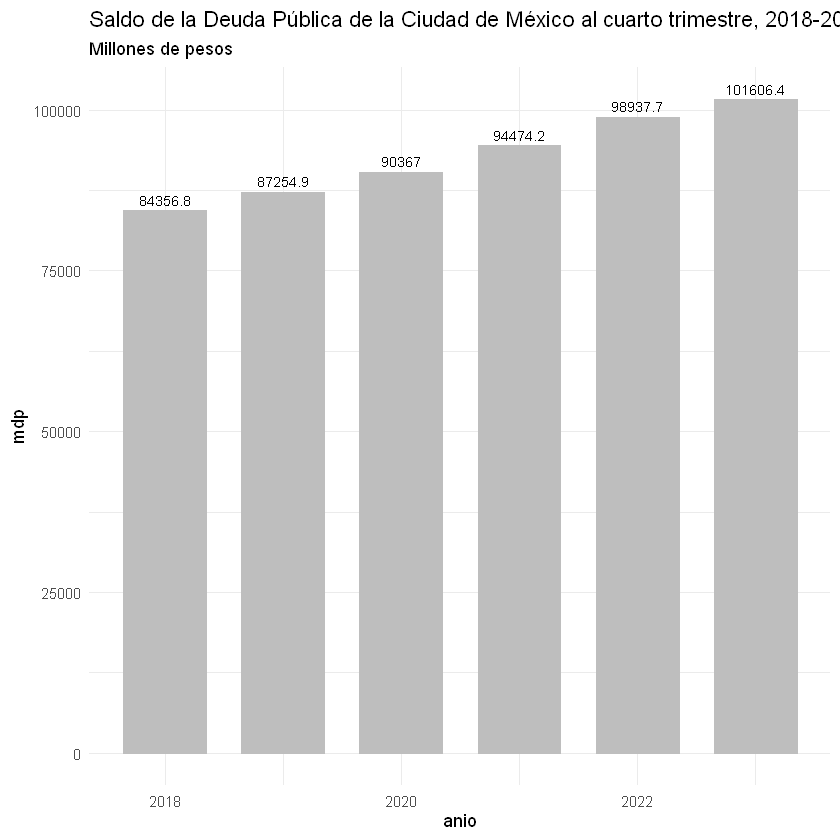

In [6]:

#Gráfica con saldo de la deuda al cuarto trimestre 2018-2023
ggplot(datos_4t, aes(x = anio, y = mdp)) +
  geom_bar(stat = "identity", fill = "grey", color = "grey", width = 0.7) +  
  geom_text(aes(label = round(mdp, 1)), vjust = -0.5, size = 3) +  
  labs(
    title = "Saldo de la Deuda Pública de la Ciudad de México al cuarto trimestre, 2018-2023",
    subtitle = "Millones de pesos"
  ) +
  theme_minimal()

Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_text()`)."


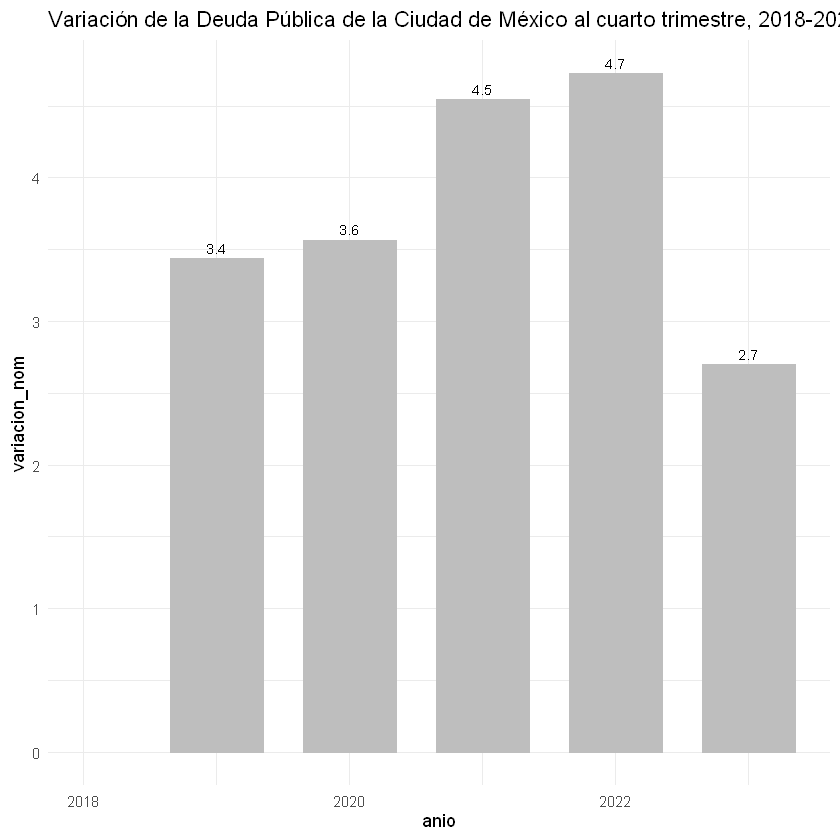

In [7]:
#Gráfica de la variación de saldo de la deuda al cuarto trimestre 2018-2023
ggplot(datos_4t, aes(x = anio, y = variacion_nom)) +
  geom_bar(stat = "identity", fill = "grey", color = "grey", width = 0.7) +  
  geom_text(aes(label = round(variacion_nom, 1)), vjust = -0.5, size = 3) +  
  labs(
    title = "Variación de la Deuda Pública de la Ciudad de México al cuarto trimestre, 2018-2023"
  ) +
  theme_minimal()


Comparación del saldo de la deuda por trimestre

In [8]:
      
datos_t <- deuda_publica %>% 
  group_by(anio, trimestre) %>%
  summarise(saldo = sum(saldo_periodo), .groups = "drop") %>% #se suma el saldo por trimestre y año
  mutate(
    mdp = as.numeric(saldo / 1000000), # convertir a millones de pesos
    trimestre_num = case_when(
      trimestre == "Primer Trimestre" ~ 1,
      trimestre == "Segundo Trimestre" ~ 2,    
      trimestre == "Tercer Trimestre" ~ 3,
      trimestre == "Cuarto Trimestre" ~ 4,
      TRUE ~ NA_real_
    )
  ) %>%                                            
  arrange(anio, trimestre_num) %>%  # ordenar por año y trimestre
  select(anio, trimestre, saldo, mdp) %>%  #Se seleccionan las columnas de interés
  mutate(variacion_nom = ((mdp)-lag(mdp))/lag(mdp) * 100) %>%  #se calcula la variación nominal respecto al trimestre anterior
  filter(anio <=2024)  #se filtran los datos hasta el año 2024 ya que el registro completo de los trimestres es consecutivo hasta el segundo trimestre de 2024
 

head(datos_t)
tail(datos_t)

anio,trimestre,saldo,mdp,variacion_nom
<int>,<chr>,<dbl>,<dbl>,<dbl>
2018,Cuarto Trimestre,84356822108,84356.82,NA
2019,Primer Trimestre,83453039576,83453.04,-1.071380
2019,Segundo Trimestre,82317288130,82317.29,-1.360947
2019,Tercer Trimestre,80715122032,80715.12,-1.946330
2019,Cuarto Trimestre,87254854640,87254.85,8.102240
2020,Primer Trimestre,86222646678,86222.65,-1.182981


anio,trimestre,saldo,mdp,variacion_nom
<int>,<chr>,<dbl>,<dbl>,<dbl>
2023,Primer Trimestre,97108312145,97108.31,-1.849028
2023,Segundo Trimestre,95269077638,95269.08,-1.894003
2023,Tercer Trimestre,93419663446,93419.66,-1.941253
2023,Cuarto Trimestre,101606425246,101606.43,8.763425
2024,Primer Trimestre,100006840119,100006.84,-1.574295
2024,Segundo Trimestre,98354231184,98354.23,-1.652496


¿Por cuánto tiempo han sido los créditos de la Ciudad de México?

In [10]:
# variable: dias_contrato, indica los días de duración del crédito.
tiempo <- deuda_publica %>% 
  mutate(id_fila = row_number())  %>%             # Crear un ID para conservar el orden original
  arrange(desc(id_fila))  %>%                     # Invertir el orden: del último al primero
 distinct(no_registro, .keep_all = TRUE) %>%      # Conservar solo la última aparición de cada no_registro
  select(anio,tipo_deuda, inicio_credito, fin_credito, detalle_tipo_deuda, saldo_periodo, acreedor, dias_contrato, no_registro, dias_restantes_contrato) %>% 
  arrange(desc(dias_contrato)) %>%                #tabla ordenada de mayor a menor de acuerdo a los número de días de duración del crédito 
  mutate(años = dias_contrato / 365) %>%          # se calcula el número de años de duración del crédito
  ungroup()
head(tiempo)
tail (tiempo)

,anio,tipo_deuda,inicio_credito,fin_credito,detalle_tipo_deuda,saldo_periodo,acreedor,dias_contrato,no_registro,dias_restantes_contrato,años
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<dbl>
1,2025,Largo Plazo,2007-09-07,2047-09-25,Banca Comercial,7000000000,HSBC,14628,233/2007,8215,40.07671
2,2025,Largo Plazo,2007-10-17,2047-10-25,Banca de Desarrollo,2876845028,BANOBRAS,14618,262/2007,8245,40.04932
3,2025,Largo Plazo,2007-10-17,2040-10-25,Banca de Desarrollo,3945041541,BANOBRAS,12062,261/2007,5689,33.04658
4,2025,Largo Plazo,2007-08-31,2040-08-27,Banca Comercial,5462932711,BANCOMER,12050,225/2007,5630,33.01370
5,2025,Largo Plazo,2007-10-17,2037-10-26,Banca de Desarrollo,4433858061,BANOBRAS,10967,260/2007,4594,30.04658
6,2025,Largo Plazo,2007-08-30,2037-07-27,Banca Comercial,3183704915,BANCOMER,10924,224/2007,4503,29.92877


,anio,tipo_deuda,inicio_credito,fin_credito,detalle_tipo_deuda,saldo_periodo,acreedor,dias_contrato,no_registro,dias_restantes_contrato,años
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>,<dbl>
57,2025,Largo Plazo,2019-12-30,2026-12-28,Banca de Desarrollo,737315301,BANOBRAS,2555,P09-1219069,639,7.000000
58,2025,Largo Plazo,2019-12-30,2026-12-28,Banca Comercial,737315301,BANCOMER,2555,P09-1219070,639,7.000000
59,2024,Largo Plazo,2017-12-29,2024-12-26,Banca Comercial,178571429,HSBC,2554,P09-1217133,181,6.997260
60,2022,Largo Plazo,2015-12-30,2022-12-26,Banca Comercial,0,SANTANDER,2553,P09-1215163,0,6.994521
61,2023,Largo Plazo,2016-12-30,2023-12-26,Banca Comercial,0,BANCOMER,2552,P09-1216083,0,6.991781
62,2021,Largo Plazo,2016-12-09,2021-12-03,Mercado de Capitales,0,EVERCORE,1820,P09-1216054,0,4.986301


In [78]:
print(paste0("Mínimo de duración de créditos ",deuda_publica %>% 
  filter(anio == 2023, trimestre == "Cuarto Trimestre") %>% 
  mutate(años = dias_contrato / 365) %>% 
  summarise(min_años = round(min(años, na.rm = TRUE), 1))))

print(paste0("Máximo de duración de créditos ",deuda_publica %>% 
  filter(anio == 2023, trimestre == "Cuarto Trimestre") %>% 
  mutate(años = dias_contrato / 365) %>% 
  summarise(max_años = round(max(años, na.rm = TRUE), 1))))


[1] "Mínimo de duración de créditos 7"
[1] "Máximo de duración de créditos 40.1"


In [11]:
#¿Cuál es el número de días de duración del crédito?
summary(tiempo$dias_contrato)
summary(tiempo$años)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1820    3646    3738    5591    7304   14628 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.986   9.989  10.240  15.317  20.011  40.077 

In [19]:
min(tiempo$fin_credito)

[1] "2019-10-25"

El crédito con menor duración de contrato fue de 1820 días, equivalente a 4.986 años.

El crédito con mayor duración de contrato fue de 14,628 días, equivalente a 40.077 años

¿De qué tipo de bancos provienen los créditos?

In [45]:
deuda_publica %>% 
filter(anio==2023)%>%
filter(trimestre == "Cuarto Trimestre")%>%
#distinct(no_registro, .keep_all = TRUE)%>%
group_by(no_registro) %>%             #se agrupa por el tipo de de banco
  summarise(registros= n ()
  ) %>%
  janitor::adorn_totals() 

no_registro,registros
<chr>,<int>
224/2007,1
225/2007,1
226/2007,1
233/2007,1
260/2007,1
261/2007,1
262/2007,1
329/2007,1
514/2008,1


In [59]:
tipo_bancos<-deuda_publica %>% 
filter(anio==2023)%>%
filter(trimestre == "Cuarto Trimestre")%>%
#distinct(no_registro, .keep_all = TRUE)%>%
group_by(detalle_tipo_deuda) %>%             #se agrupa por el tipo de de banco
  summarise(registros= n (),
  deuda=sum(saldo_periodo)
  
  ) %>%
  mutate(pct= (registros / sum(registros)) * 100,
  pct=round(pct,1)
  )%>%
  janitor::adorn_totals() 

  tipo_bancos

detalle_tipo_deuda,registros,deuda,pct
<chr>,<int>,<dbl>,<dbl>
Banca Comercial,22,43772406915,39.3
Banca de Desarrollo,26,45159018331,46.4
Mercado de Capitales,8,12675000000,14.3
Total,56,101606425246,100.0


In [56]:
deuda_publica %>% 
filter(anio==2023)%>%
filter(trimestre == "Cuarto Trimestre")%>%
filter(inicio_credito=='2023-12-15')

anio,trimestre,mes,no_registro,tipo_deuda,detalle_tipo_deuda,acreedor,concepto,inicio_credito,fin_credito,⋯,disposicion_inicial_credito,colocacion_periodo,amortizaciones_periodo,intereses_periodo,pago_servicio_deuda,saldo_periodo,endeudamiento_periodo,tasa,sobretasa,tasa_final
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2023,Cuarto Trimestre,Diciembre,P09-1223078,Largo Plazo,Banca Comercial,SANTANDER,"SANTANDER 2,169",2023-12-15,2033-12-14,⋯,2169946419,2169946419,0,0,0,2169946419,2169946419,9.1999999999999993,NA,9.1999999999999993
2023,Cuarto Trimestre,Diciembre,P09-1223079,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 2,500 23-1",2023-12-15,2043-12-15,⋯,2500000000,2500000000,0,0,0,2500000000,2500000000,8.83,NA,8.83
2023,Cuarto Trimestre,Diciembre,P09-1223080,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 2,500 23-2",2023-12-15,2043-12-15,⋯,2500000000,2500000000,0,0,0,2500000000,2500000000,8.93,NA,8.93
2023,Cuarto Trimestre,Diciembre,P09-1223081,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 5,276",2023-12-15,2043-12-15,⋯,4974578885,4974578885,0,0,0,4974578885,4974578885,TIIE Fondeo,0.44,TIIE Fondeo+0.44


¿De qué bancos vienen los créditos?

In [82]:
bancos <- deuda_publica %>%                     
  filter(anio==2023) %>%
  filter(trimestre == "Cuarto Trimestre") %>%
  group_by(acreedor) %>%                       #se agrupa por el acreedor
  summarise(registros= n ()) %>%               #se cuenta el número de registros por acreedor
  mutate(total = sum(registros),               #se calcula el total de registros y se saca el porcentaje de cada acreedor
         porcentaje = (registros /total) * 100) %>% 
  arrange(desc(porcentaje))%>%                    #se ordena de mayor a menor el porcentaje
janitor::adorn_totals()
bancos

acreedor,registros,total,porcentaje
<chr>,<int>,<int>,<dbl>
BANOBRAS,26,56,46.428571
BANCOMER,14,56,25.000000
CI BANCO,8,56,14.285714
HSBC,3,56,5.357143
SANTANDER,3,56,5.357143
BANAMEX,2,56,3.571429
Total,56,336,100.000000


Relación entre deuda e ingresos

In [83]:
#Se descarga la data de ingresos de la Ciudad de México
ingresos_cdmx <- read_csv("https://datos.cdmx.gob.mx/dataset/f04b7092-782d-4206-9590-ac8b577891dc/resource/77c2e268-f5b4-4cdf-a705-13a73a9608b3/download/ingresos_2024_01.csv", 
                          col_types = NULL)
#MONTO TOTAL DE INGRESOS RECAUDADOS
recaudados_por_ciclo <- ingresos_cdmx|>
  filter(periodo == "Cuenta Pública",
         desc_rubro !=  "Ingresos Derivados de Financiamientos") |>
  group_by(ciclo)|>
 summarise(monto_recau = sum(monto_recaudado, na.rm = TRUE)/1000000)|>
   mutate(var = round((monto_recau/lag(monto_recau, 1)-1)*100,1))
recaudados_por_ciclo

Rows: 2281 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): periodo, desc_tipo_recurso_clase, desc_rubro, desc_tipo, clase, de...
dbl  (6): ciclo, tipo_recurso_clase, rubro, tipo, monto_estimado, monto_reca...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ciclo,monto_recau,var
<dbl>,<dbl>,<dbl>
2018,236843.1,NA
2019,243512.7,2.8
2020,232415.8,-4.6
2021,232634.4,0.1
2022,267424.7,15.0
2023,295619.3,10.5


In [86]:

#se junta las datas referentes a los ingresos y el saldo de la deuda pública para 2018-2024
recaudados_por_ciclo <- recaudados_por_ciclo %>%  
  filter(ciclo <= 2023) #Se filtran los datos hasta el año 2023 ya que el registro completo de los ciclos es consecutivo hasta el primer ciclo de 2024
datos <- cbind(datos_4t, recaudados_por_ciclo) %>% #se unen las dos tablas 
  select(ciclo, mdp2, monto_recau) %>% 
  rename(año = ciclo, dif_saldo = mdp2) %>% 
  mutate(porcentaje = (dif_saldo / monto_recau) * 100) #Se calcula el porcentaje de la diferencia del saldo de la deuda respecto a los ingresos recaudados
datos

año,dif_saldo,monto_recau,porcentaje
<dbl>,<dbl>,<dbl>,<dbl>
2018,NA,236843.1,NA
2019,2898.033,243512.7,1.1900950
2020,3112.107,232415.8,1.3390252
2021,4107.233,232634.4,1.7655311
2022,4463.503,267424.7,1.6690691
2023,2668.728,295619.3,0.9027583
